In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import seaborn as sns

from plotting_function import *

import warnings
warnings.filterwarnings('ignore')



In [2]:
data = pd.read_csv('data/Customer-Churn.csv')
cc = data.copy() #customer churn

In [3]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
cc.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [5]:
cc.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1521,9207-ZPANB,Male,0,No,No,37,Yes,Yes,DSL,Yes,...,Yes,Yes,No,No,One year,No,Electronic check,67.45,2443.3,No
1740,1222-KJNZD,Male,0,Yes,Yes,40,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),20.40,745.3,No
5418,8490-BXHEO,Male,1,No,No,18,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),80.55,1411.65,No
3748,6339-RZCBJ,Male,0,No,No,48,Yes,No,DSL,No,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),78.90,3771.5,No
2004,8565-CLBZW,Male,0,No,No,24,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Mailed check,89.85,2165.05,Yes


In [6]:

#Print total number of missing values
print(f"Missing Values: {cc.isnull().values.sum()} \n")
#Print number of unique values per feature location
print(f"Unique Values:\n{cc.nunique()} \n")

Missing Values: 0 

Unique Values:
customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64 



In [7]:
# make all column names lower case
cc.columns = map(str.lower, cc.columns)
cc.columns


Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [8]:
# convert empty string value to 0
cc = cc.replace(" ", 0)
cc.totalcharges = cc.totalcharges.astype('float64')



Save the processed data to a new csv file.

In [10]:
# save a new csv file
cc.to_csv('data/cleaned_data.csv')

# <span style="color: green">Exploration
* Dataset has 7043 rows, with 21 colums. Each column represents a unique customer.
* <b>Target variable</b> is <b>Churn</b>.
* There are 3 <b>Nominal Features</b>: Tenure, MonthlyCharges, TotalCharges.
* There are 15 <b>Categorical Features</b>: Gender ,SeniorCitizen, Dependents, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup ,DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod.

# <span style="color: green">Analysis

## 1. Target variable: Churn

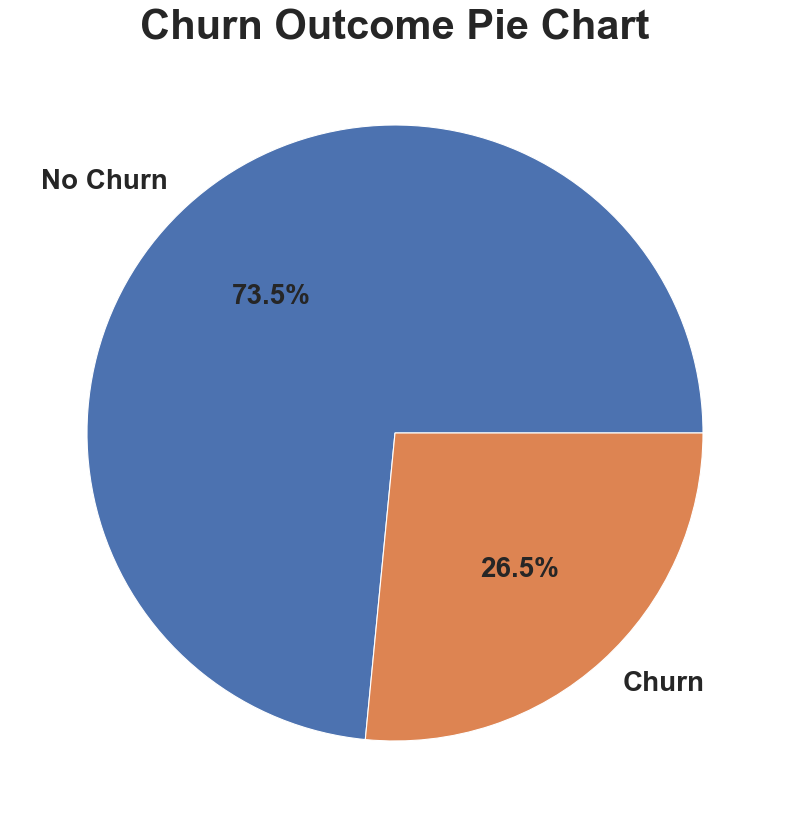

In [10]:
churn_pie_plot(cc)

## 2. Numerical Features

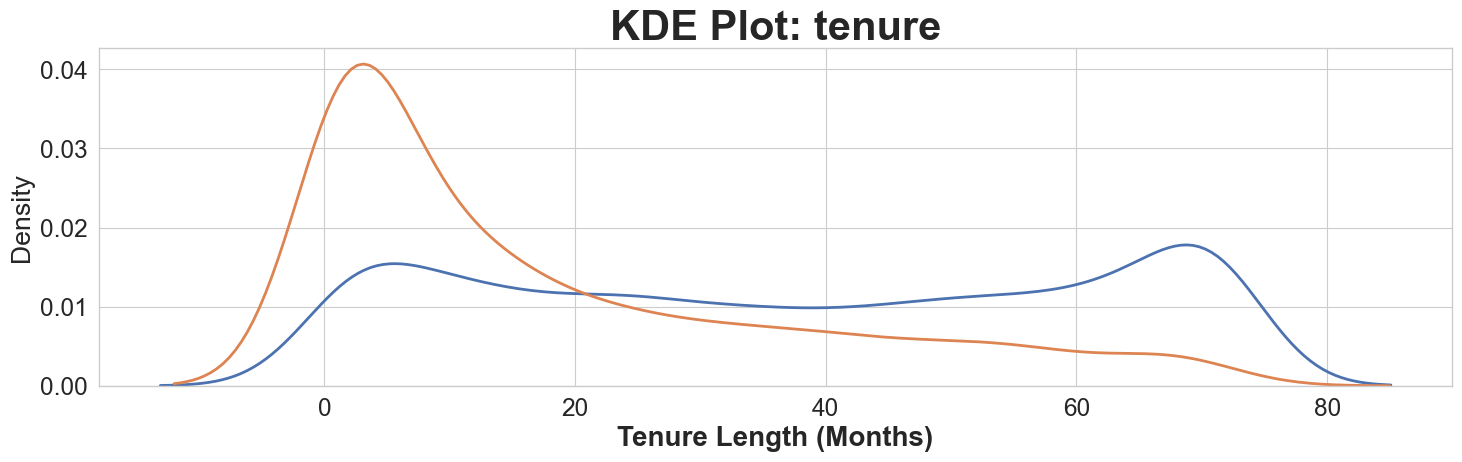

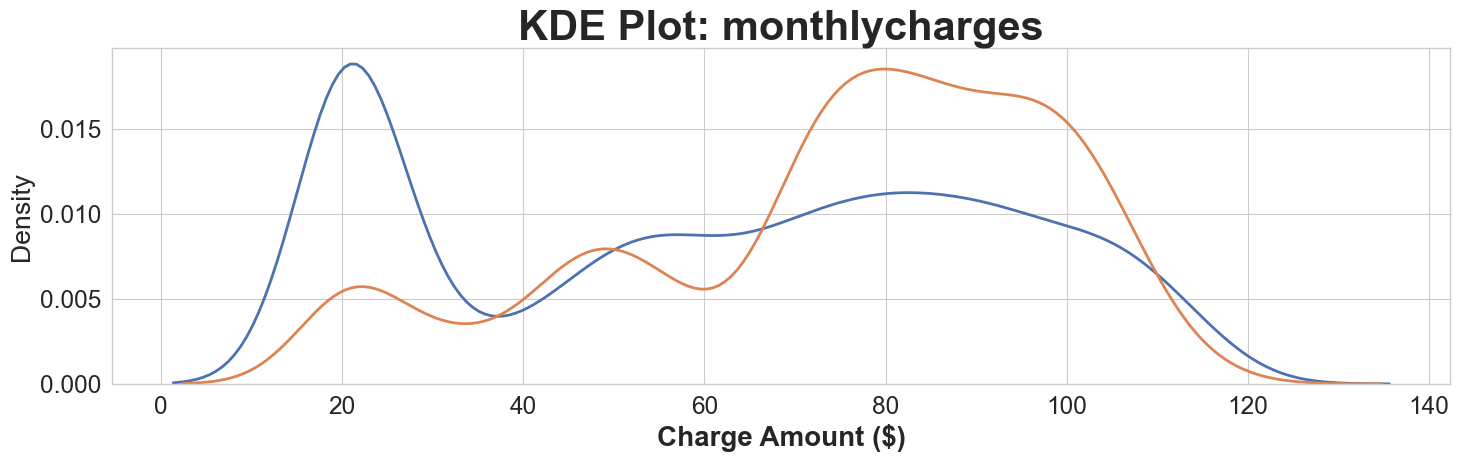

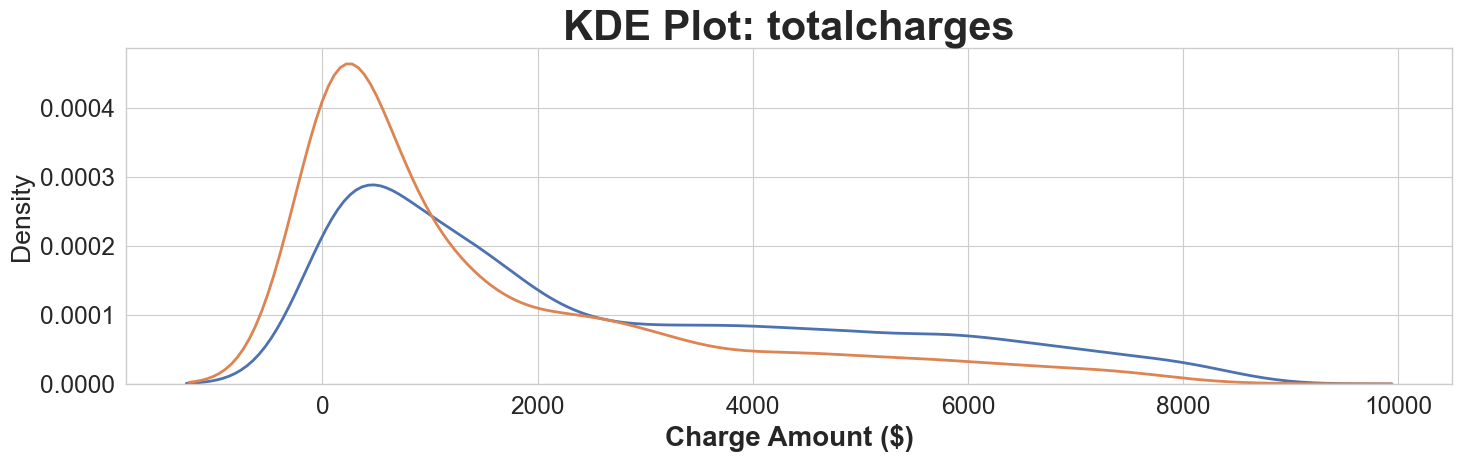

In [11]:
# kde - kernel density estimations
kde_plot(cc, 'tenure')
kde_plot(cc, 'monthlycharges')
kde_plot(cc, 'totalcharges')

In [12]:
cc['grouped_tenure']= cc.apply(lambda cc:group_tenure(cc), axis=1)

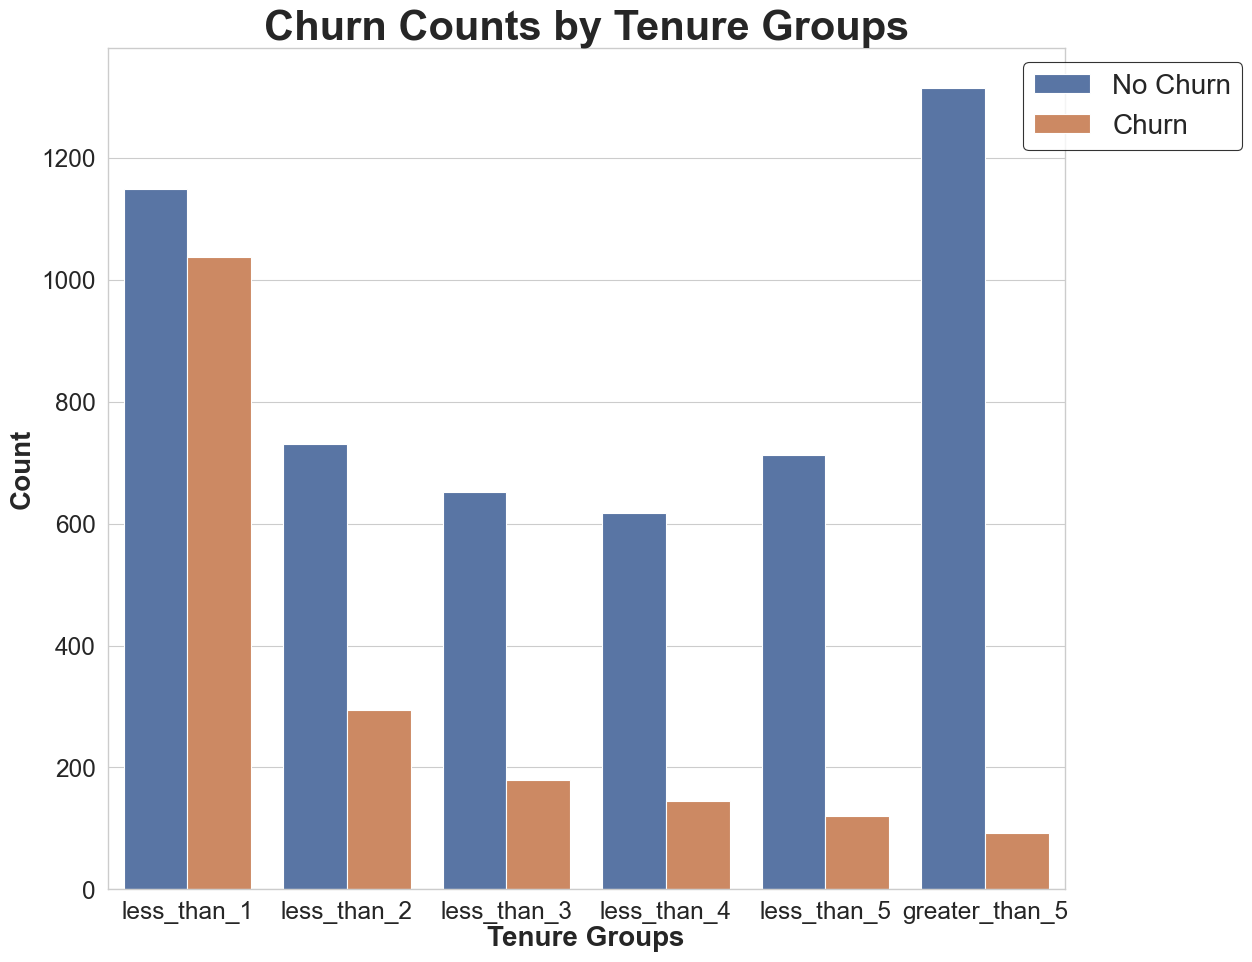

In [13]:
tenure_groups_plot(cc)

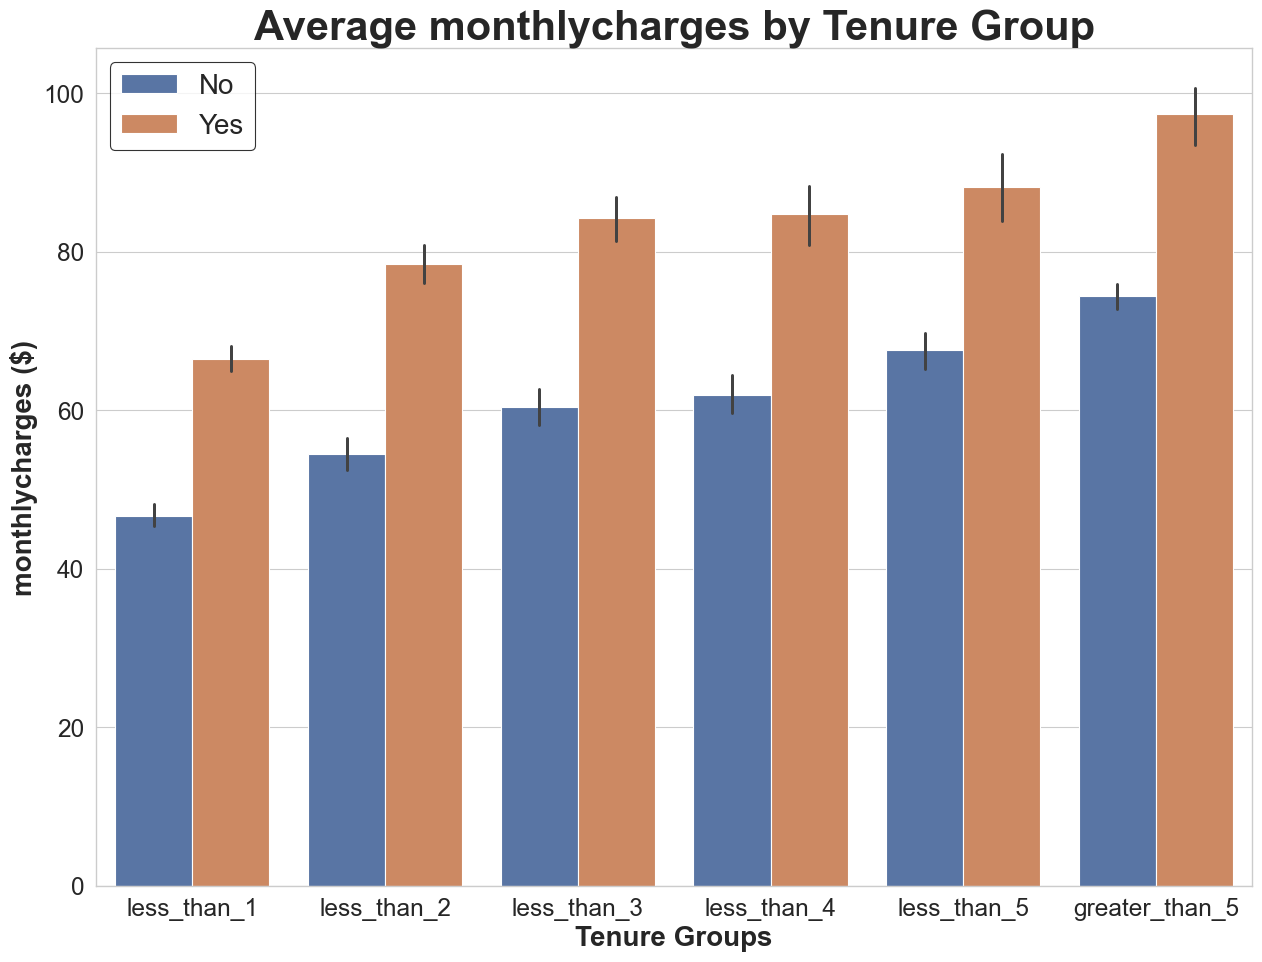

In [14]:
# average montlychargess by TenureGroup
numerical_averages_plot(cc, 'monthlycharges')

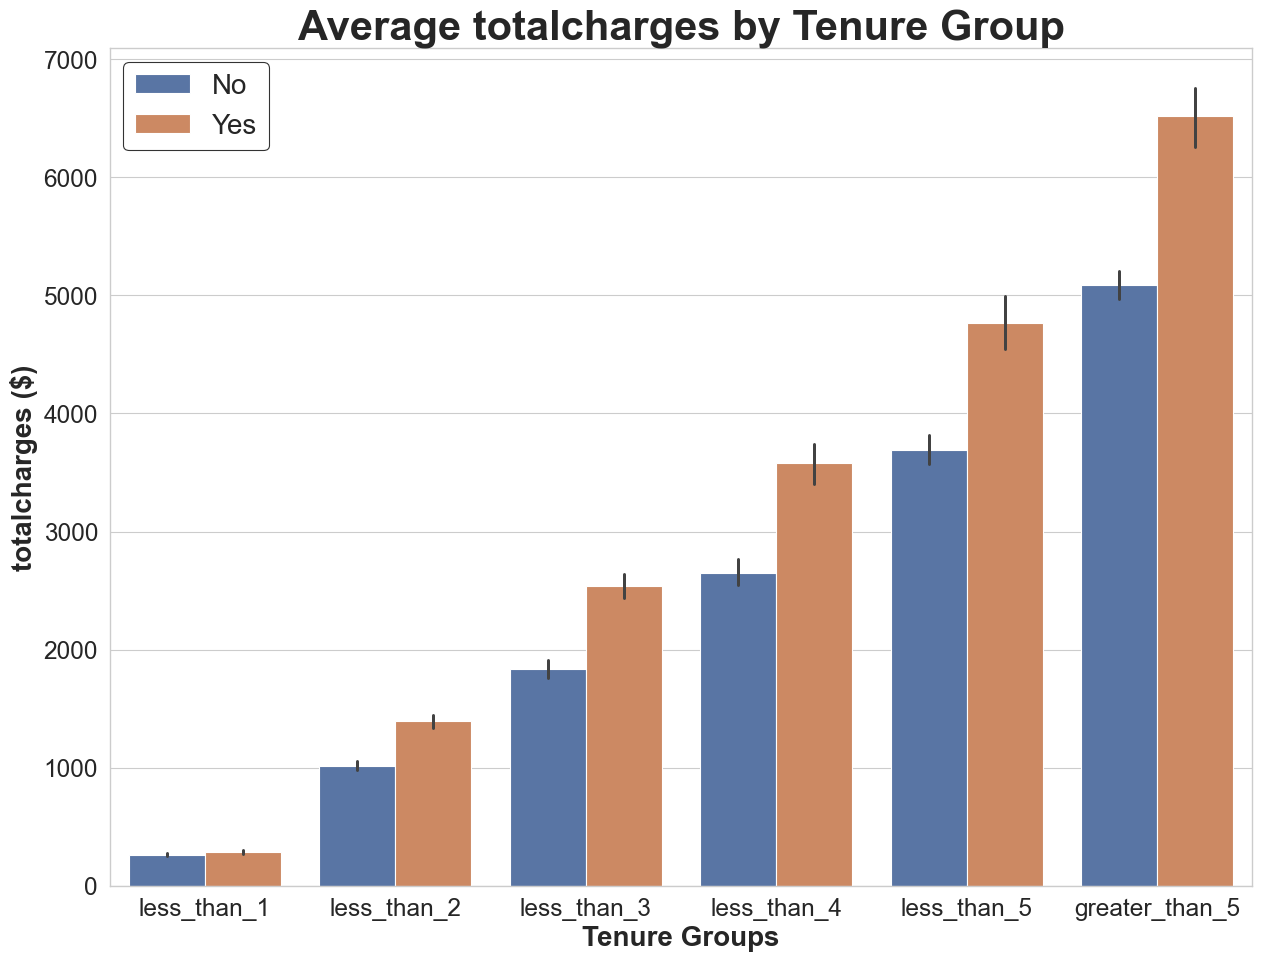

In [15]:
# average totalcharges by TenureGroup
numerical_averages_plot(cc, 'totalcharges')


* <b>Tenure: </b> newer customers (those with lower service tenures) have higher chance to churn.
* <b>Monthly Charges: </b> Customers are more likely to churn as monthly charges increase. Customers with highest probability of churning are those with charges exceed 60 dollars. The majority of those who are not churning have their bills around 20 dollars and just over 80 dollars.
* <b>Total Charges: </b> this distribution is general and does not add much impacts to the analysis.

## 3. Categorial Features

### Gender

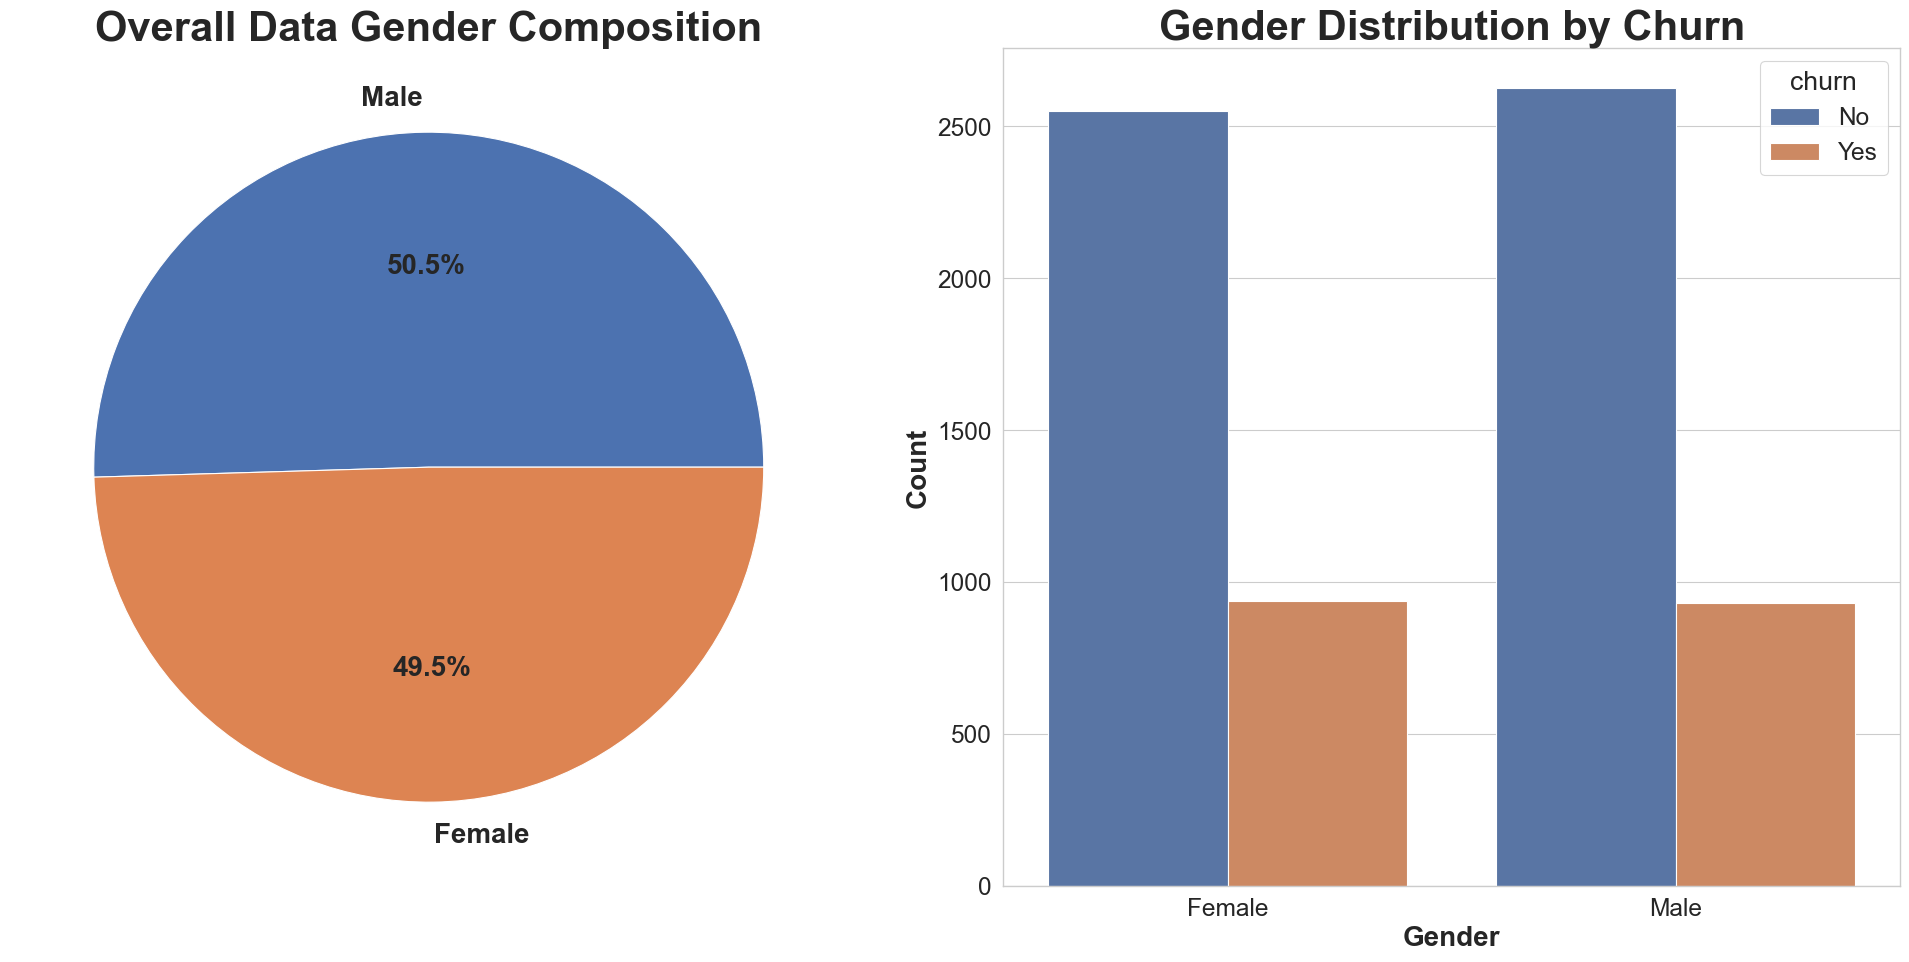

In [16]:
# gender distribution
gender_plot(cc)

<b>Gender</b> is equivalent and does not have big impact on posibility to churn.

### Age

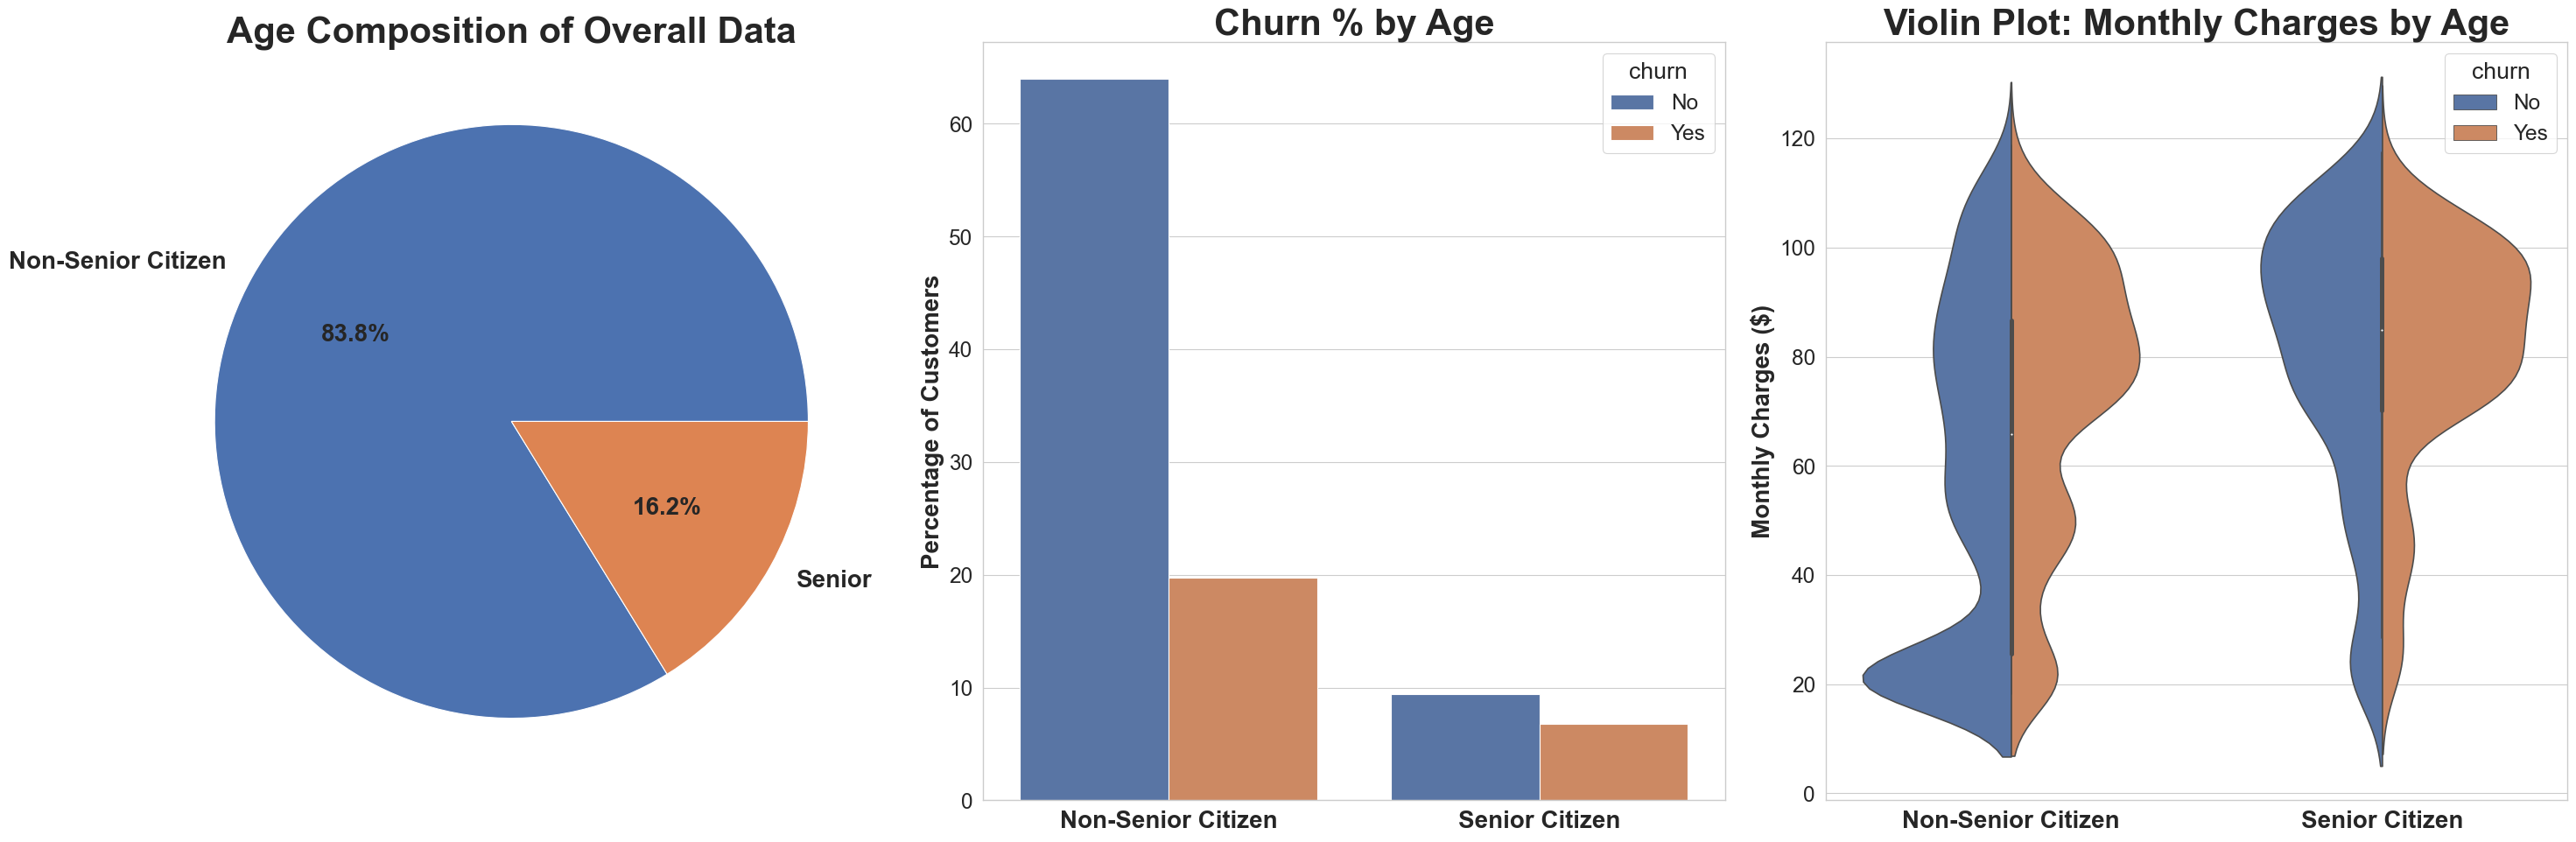

In [17]:
age_plot(cc)


* Dataset has significantly less senior than non senior.
* Non-senior citizens are more likely to churn.

### Partner & dependents

In [18]:
# partner and dependents distribution
cc[cc.churn == 'Yes'].partner.value_counts()

No     1200
Yes     669
Name: partner, dtype: int64

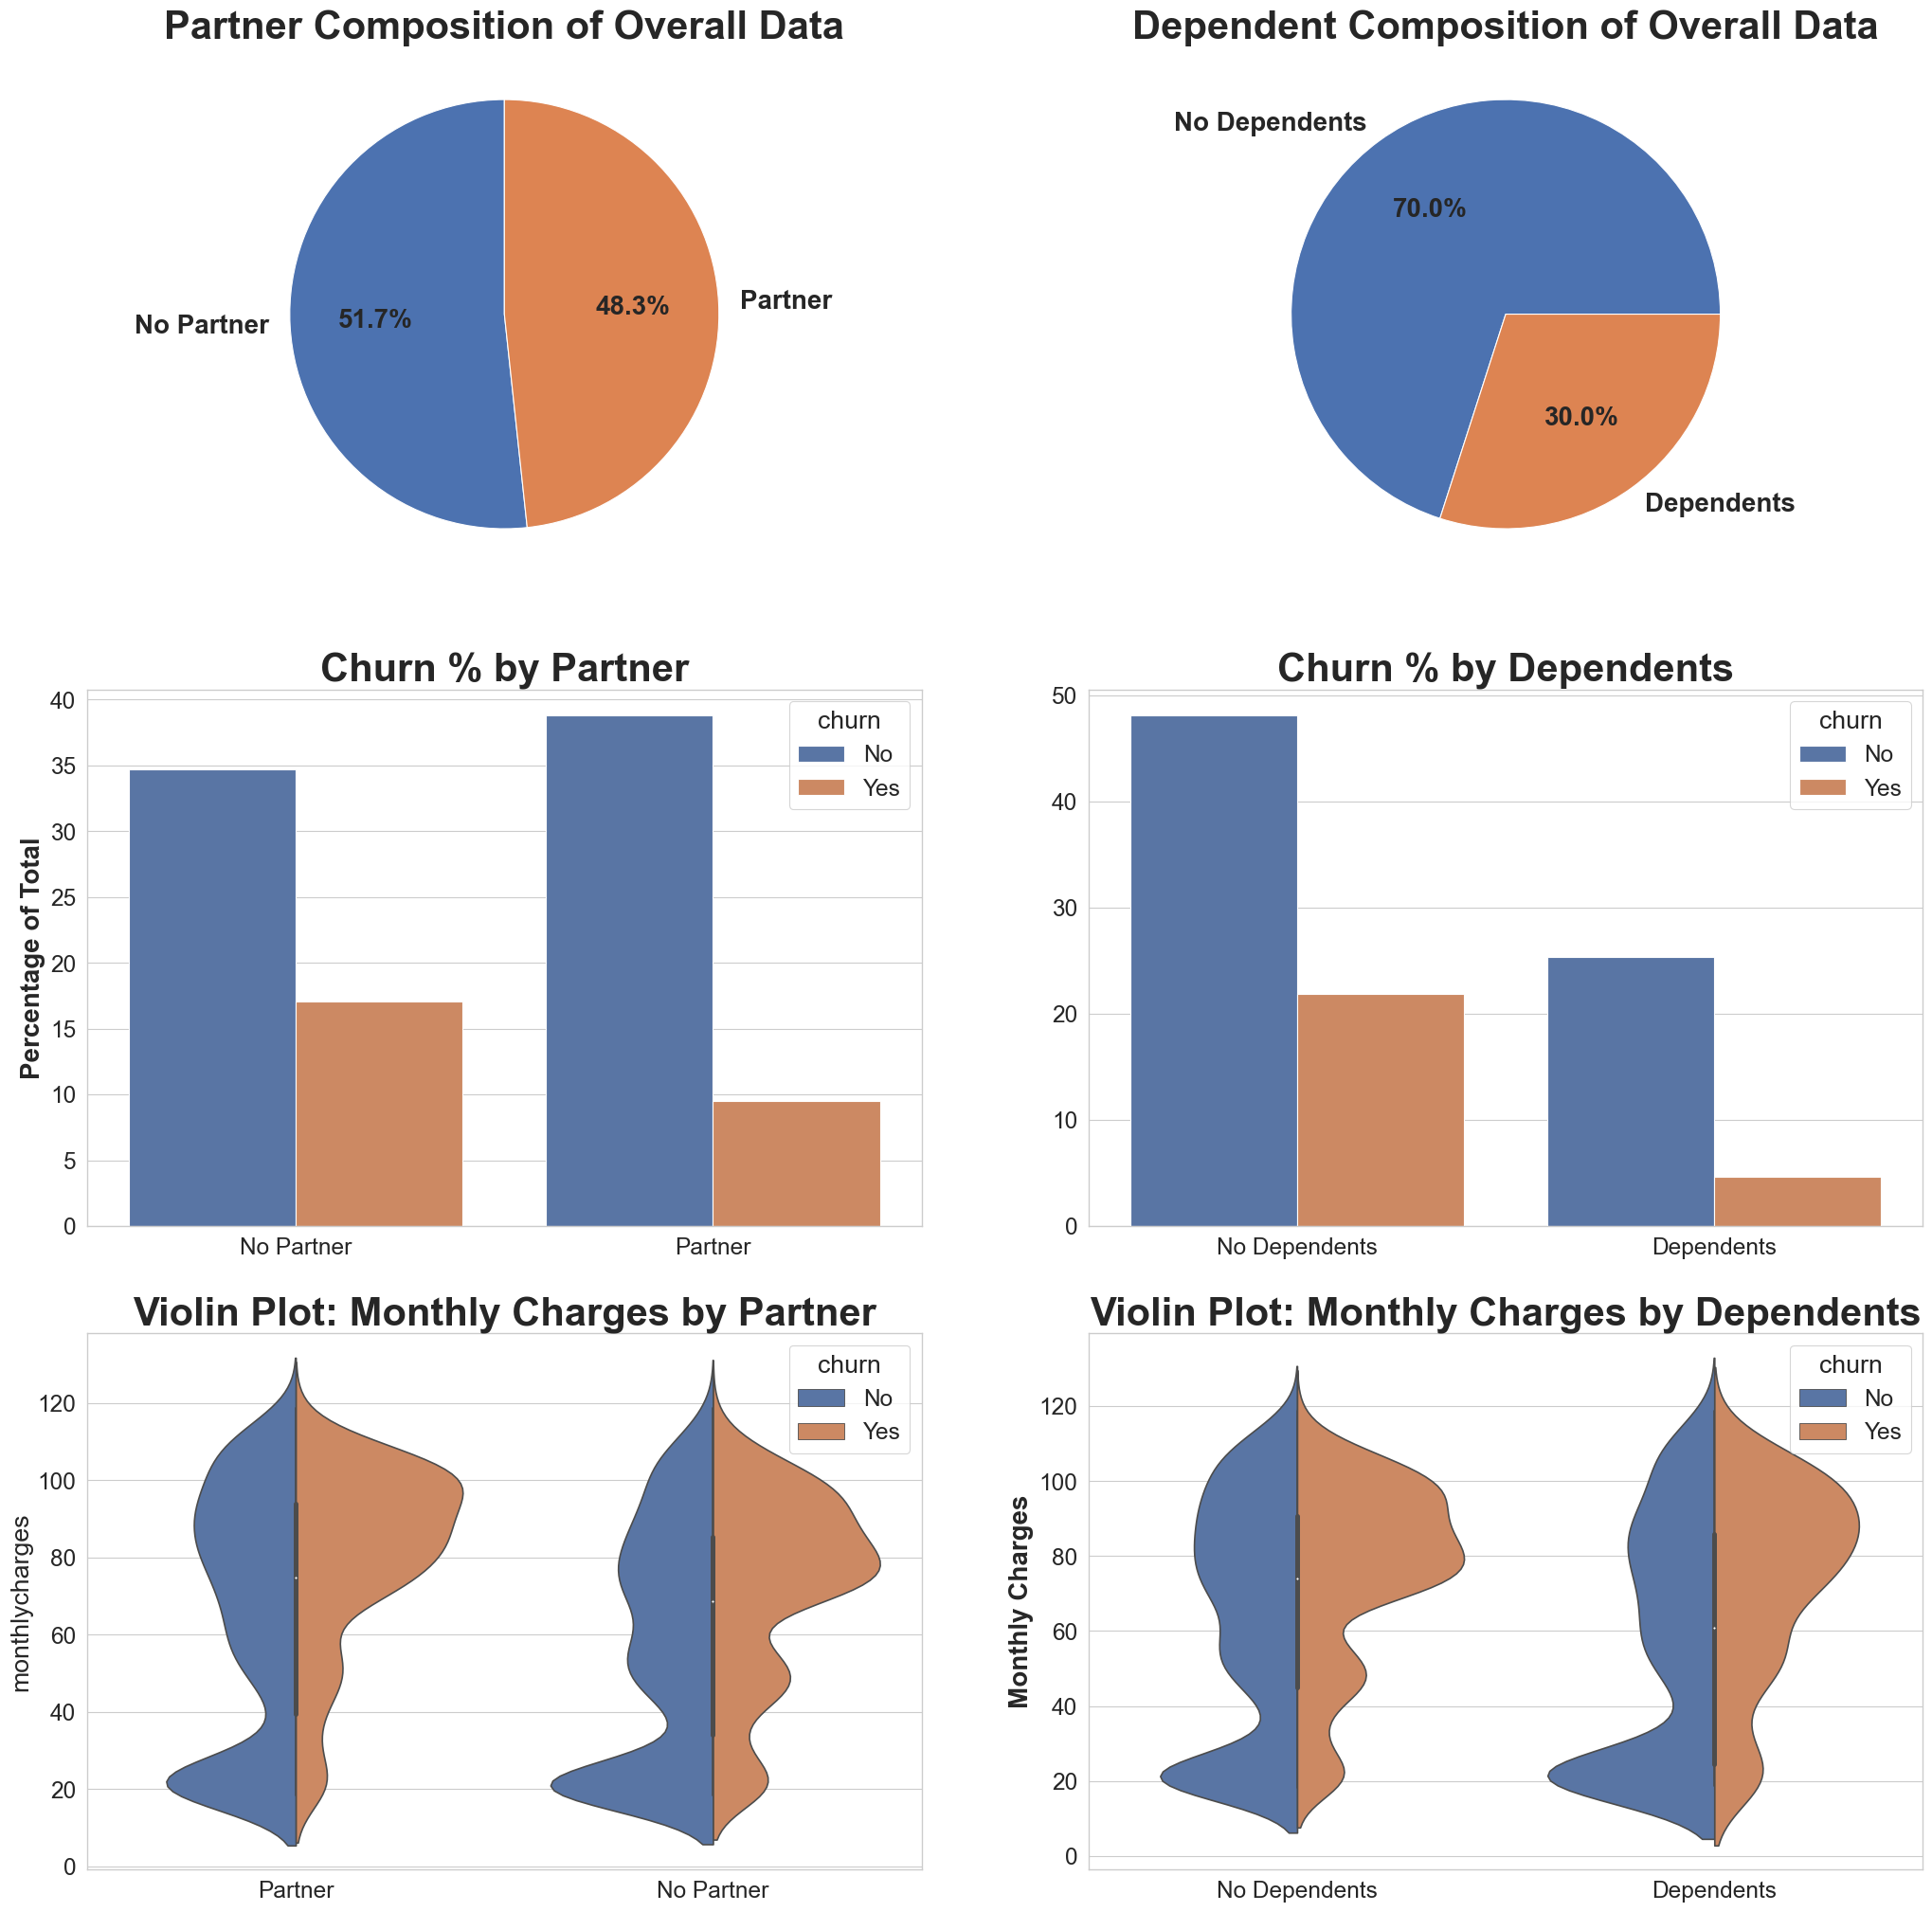

In [19]:
partner_dependents_plot(cc)


* Customers without partners are more likely to churn.
* Customers without dependents are more likely to churn.

### Phone Services & Line Quantities

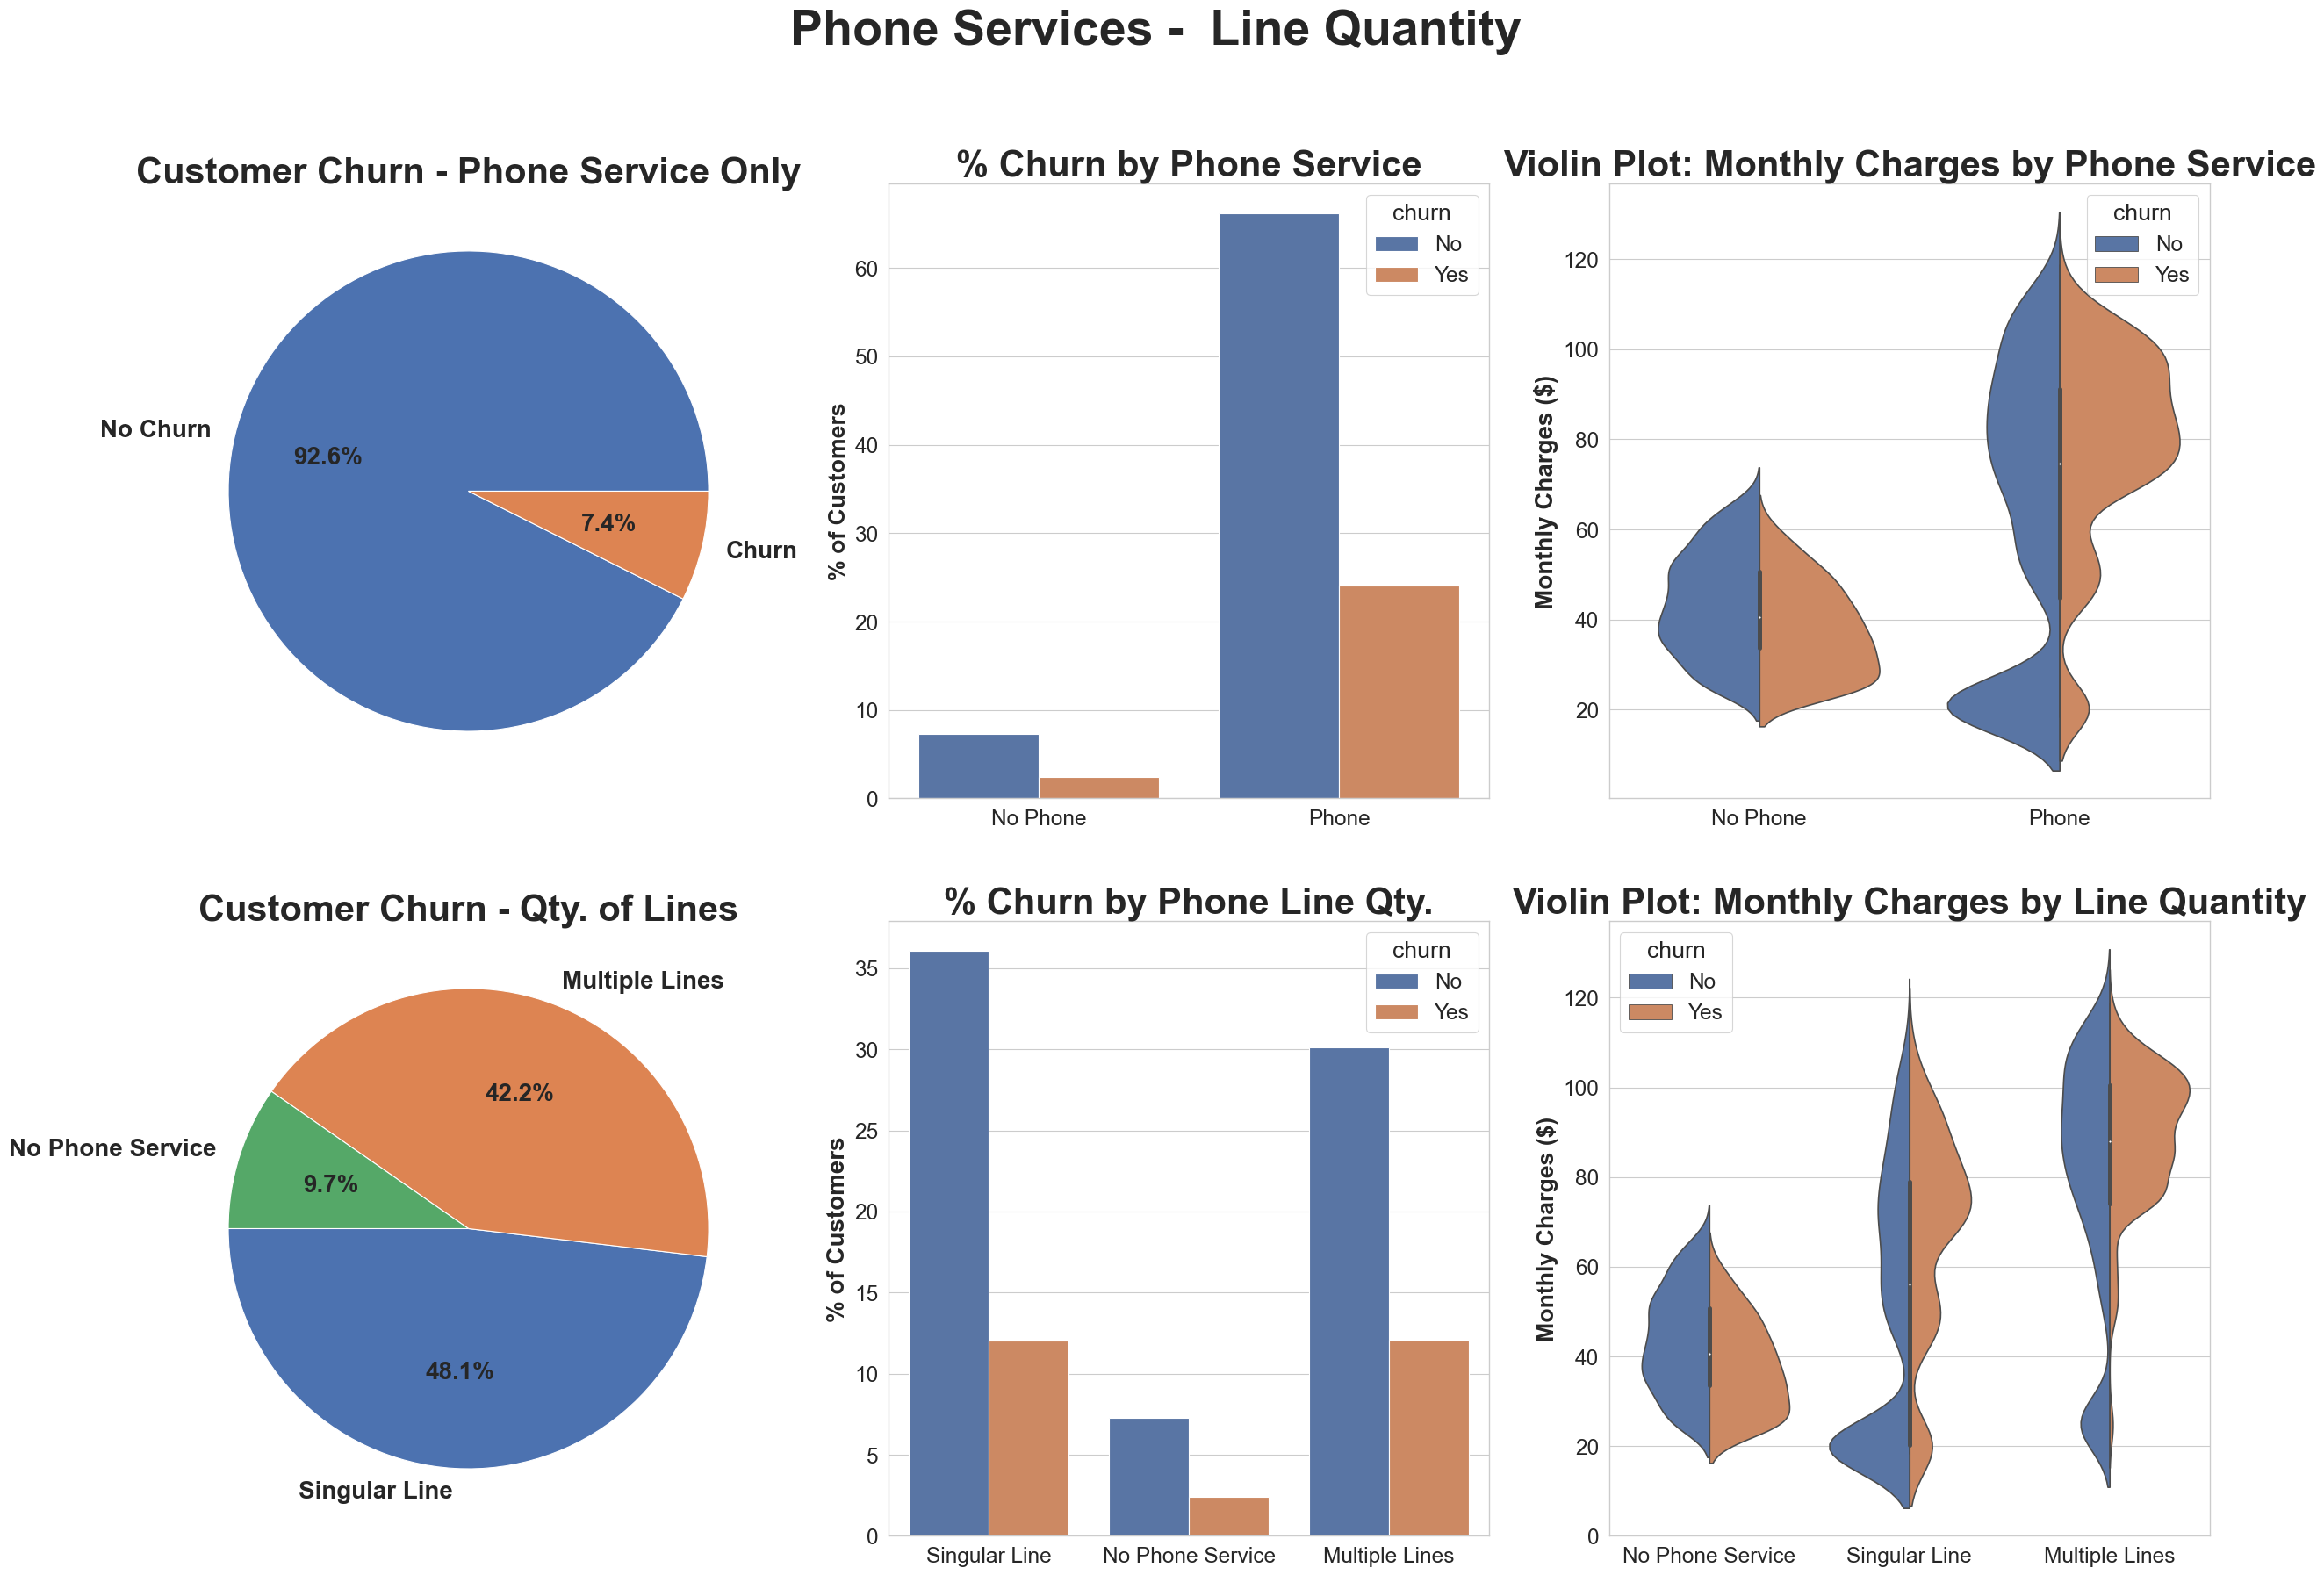

In [20]:
# plot phone services and line quantities
phone_n_line_plot(cc)


* Customers with phone service are significantly less likely to churn.
* Customers with phone service pay a higher monthly charge.
* Multiple lines and Singular lines customers have approximately the same rate of churning
* Customer with multiple lines pay a higher monthly charge.

### Internet Service

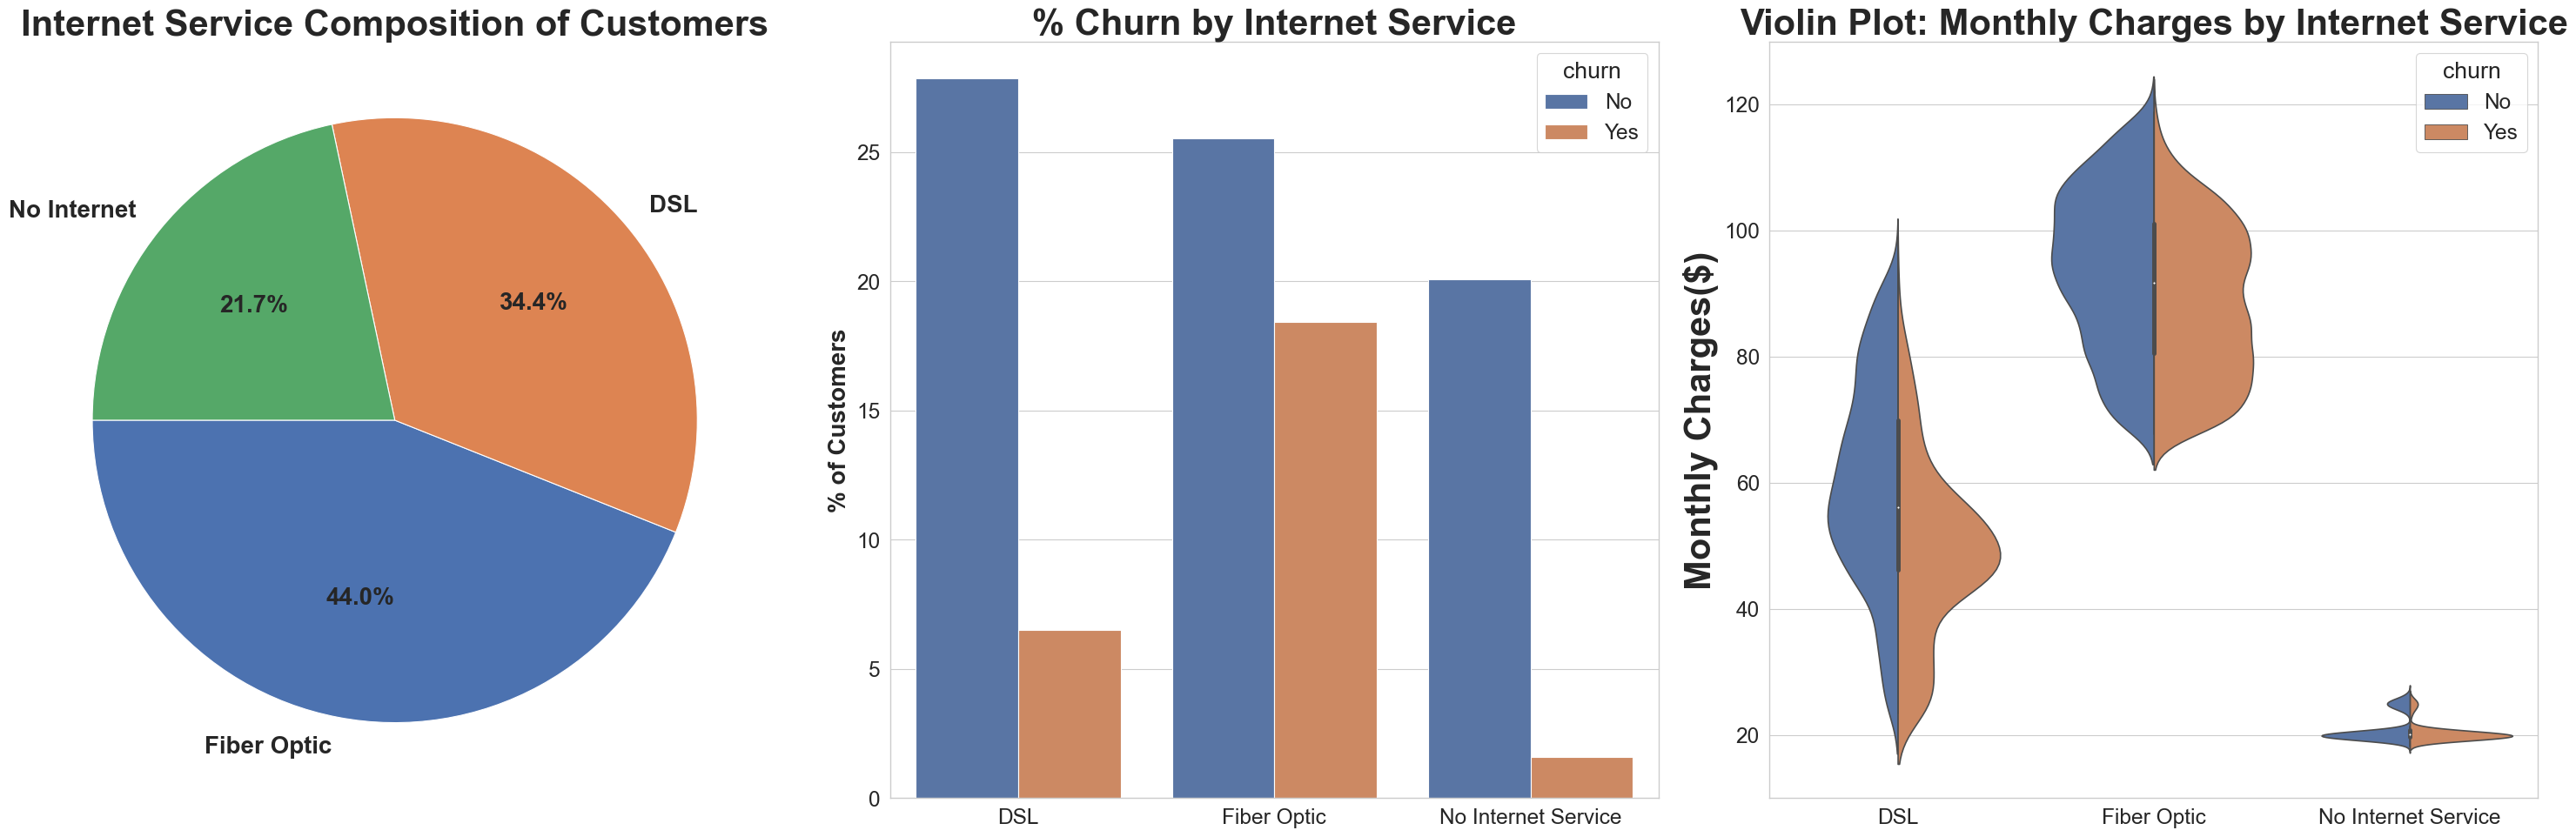

In [21]:
# internet service distribution
internet_plot(cc)

### Add-on Services

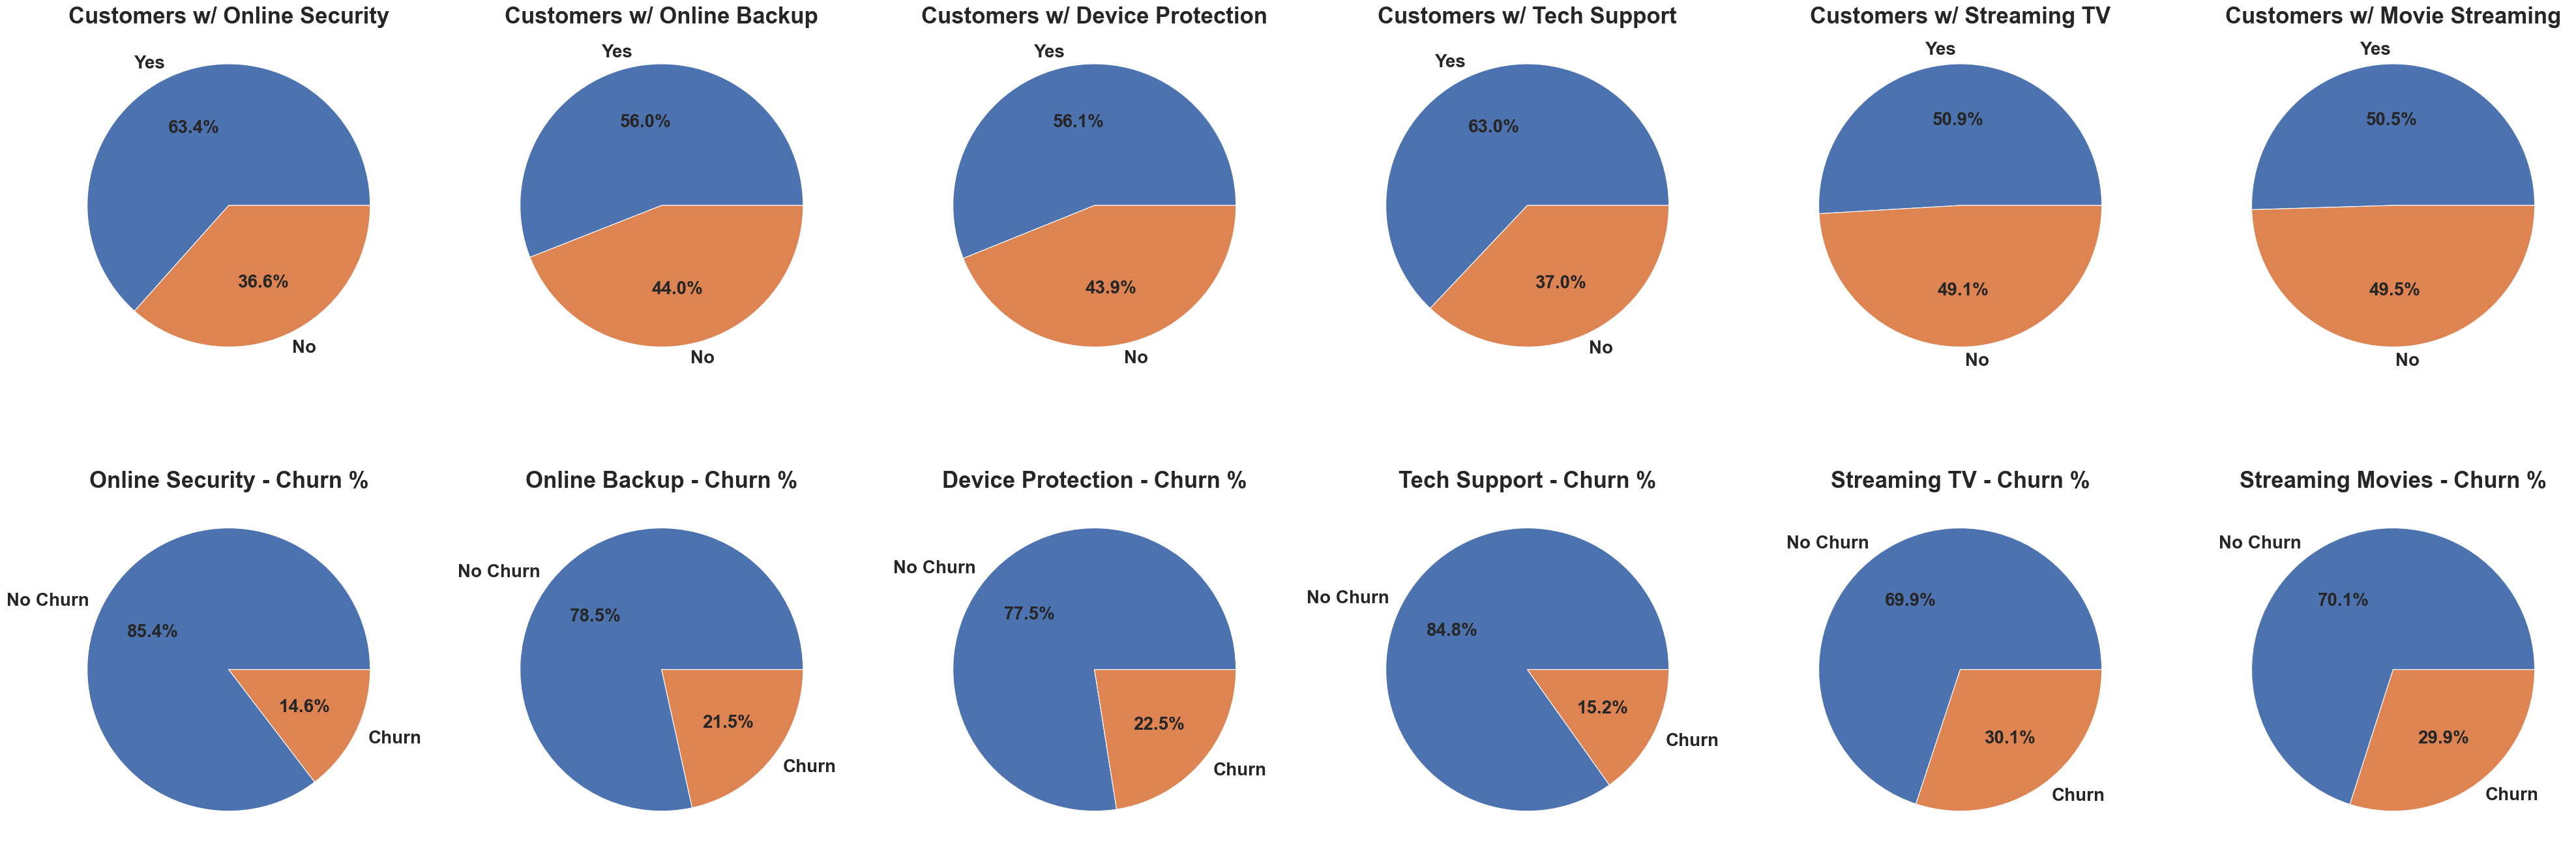

In [22]:
services_plot(cc)

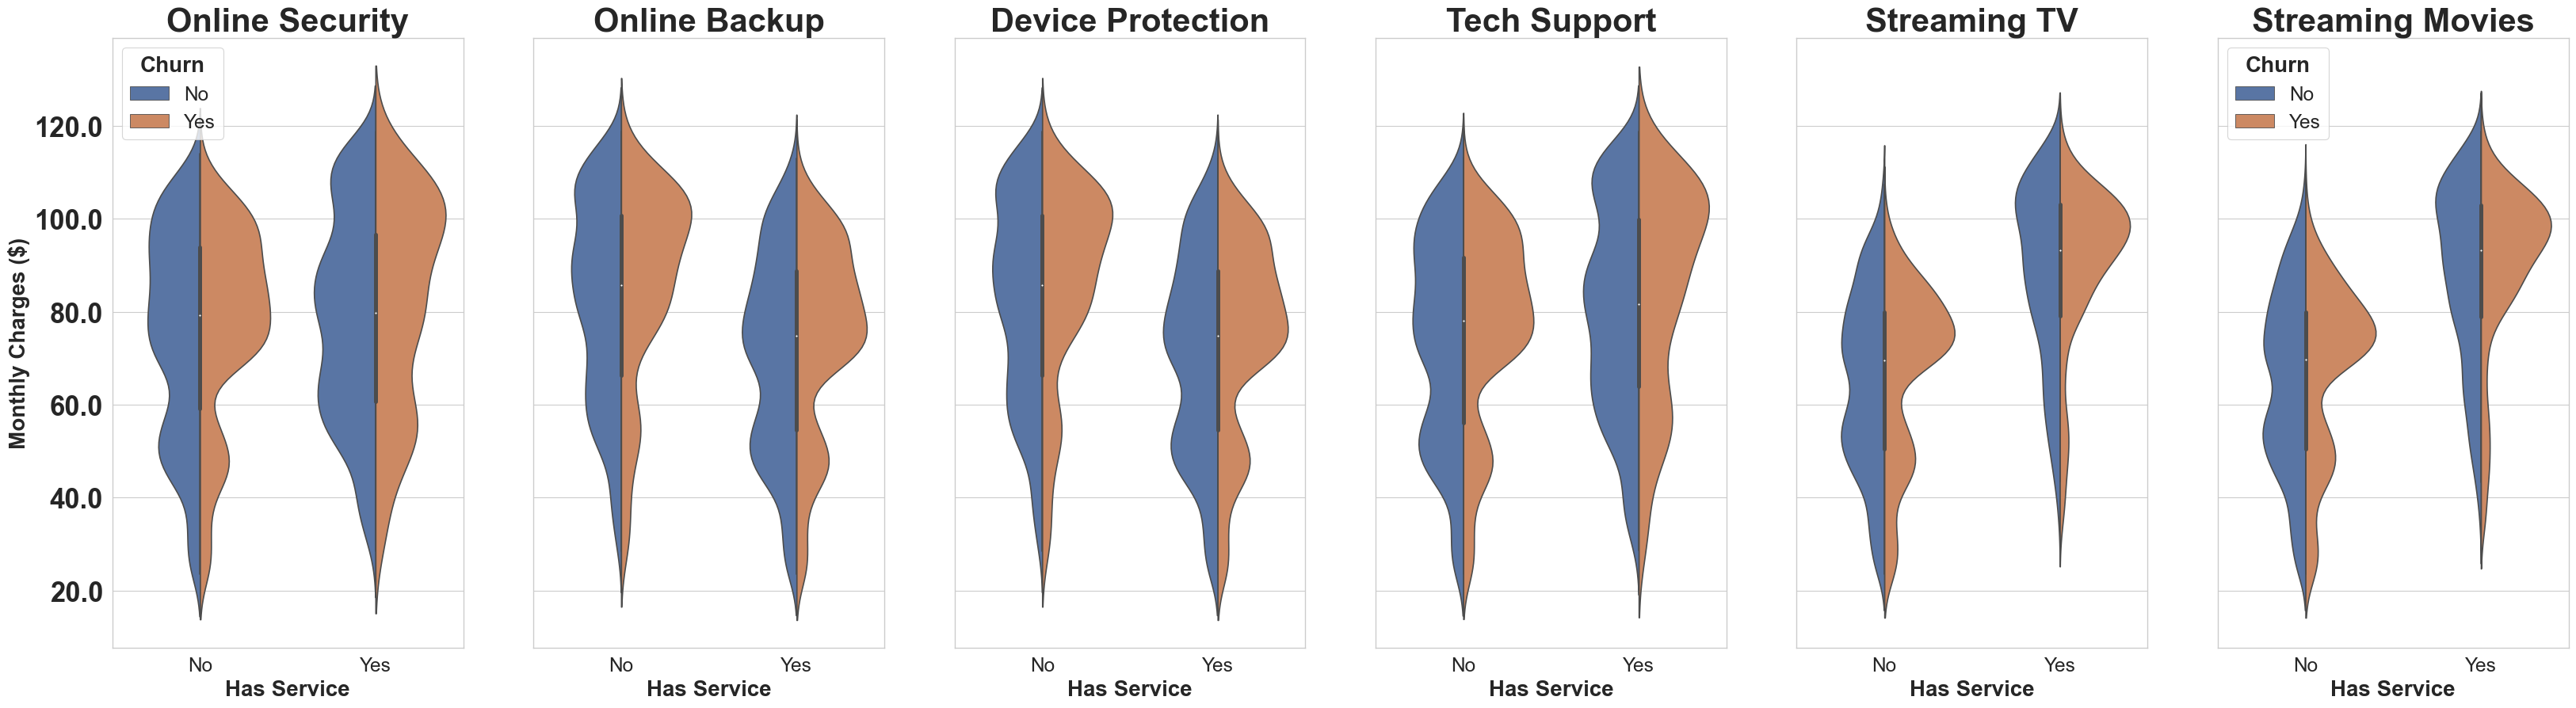

In [23]:
service_charges_plot(cc)

* Customers with streaming services churn the most.
* Monthly charge peak around $100.

### Contracts

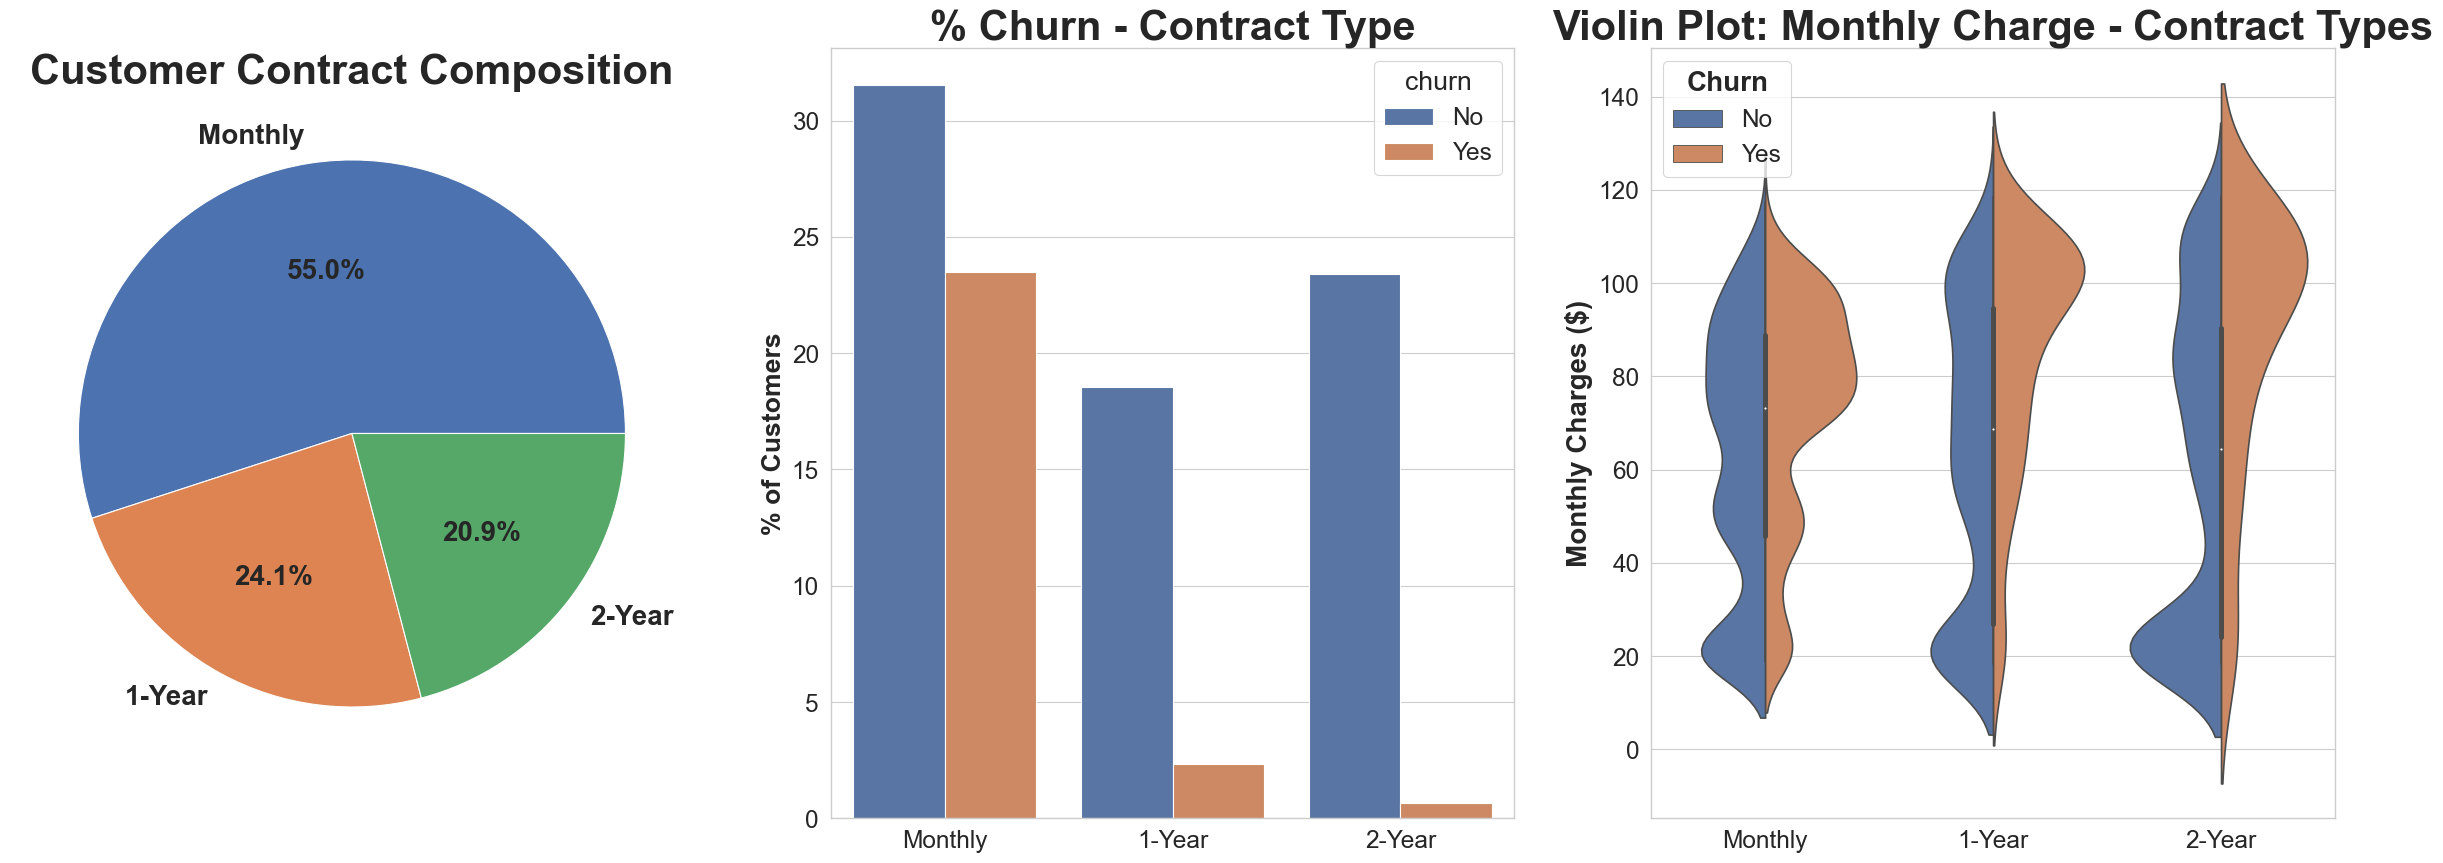

In [24]:
contracts_plot(cc)

* More than half of the customers use a monthly payment plan.
* Significantly more customers churn on monthly plan.
* The longer the contract, the lower the churn rate.
* The longer the contract, the higher the monthly charges.

### Paperless Billing & Payment Methods

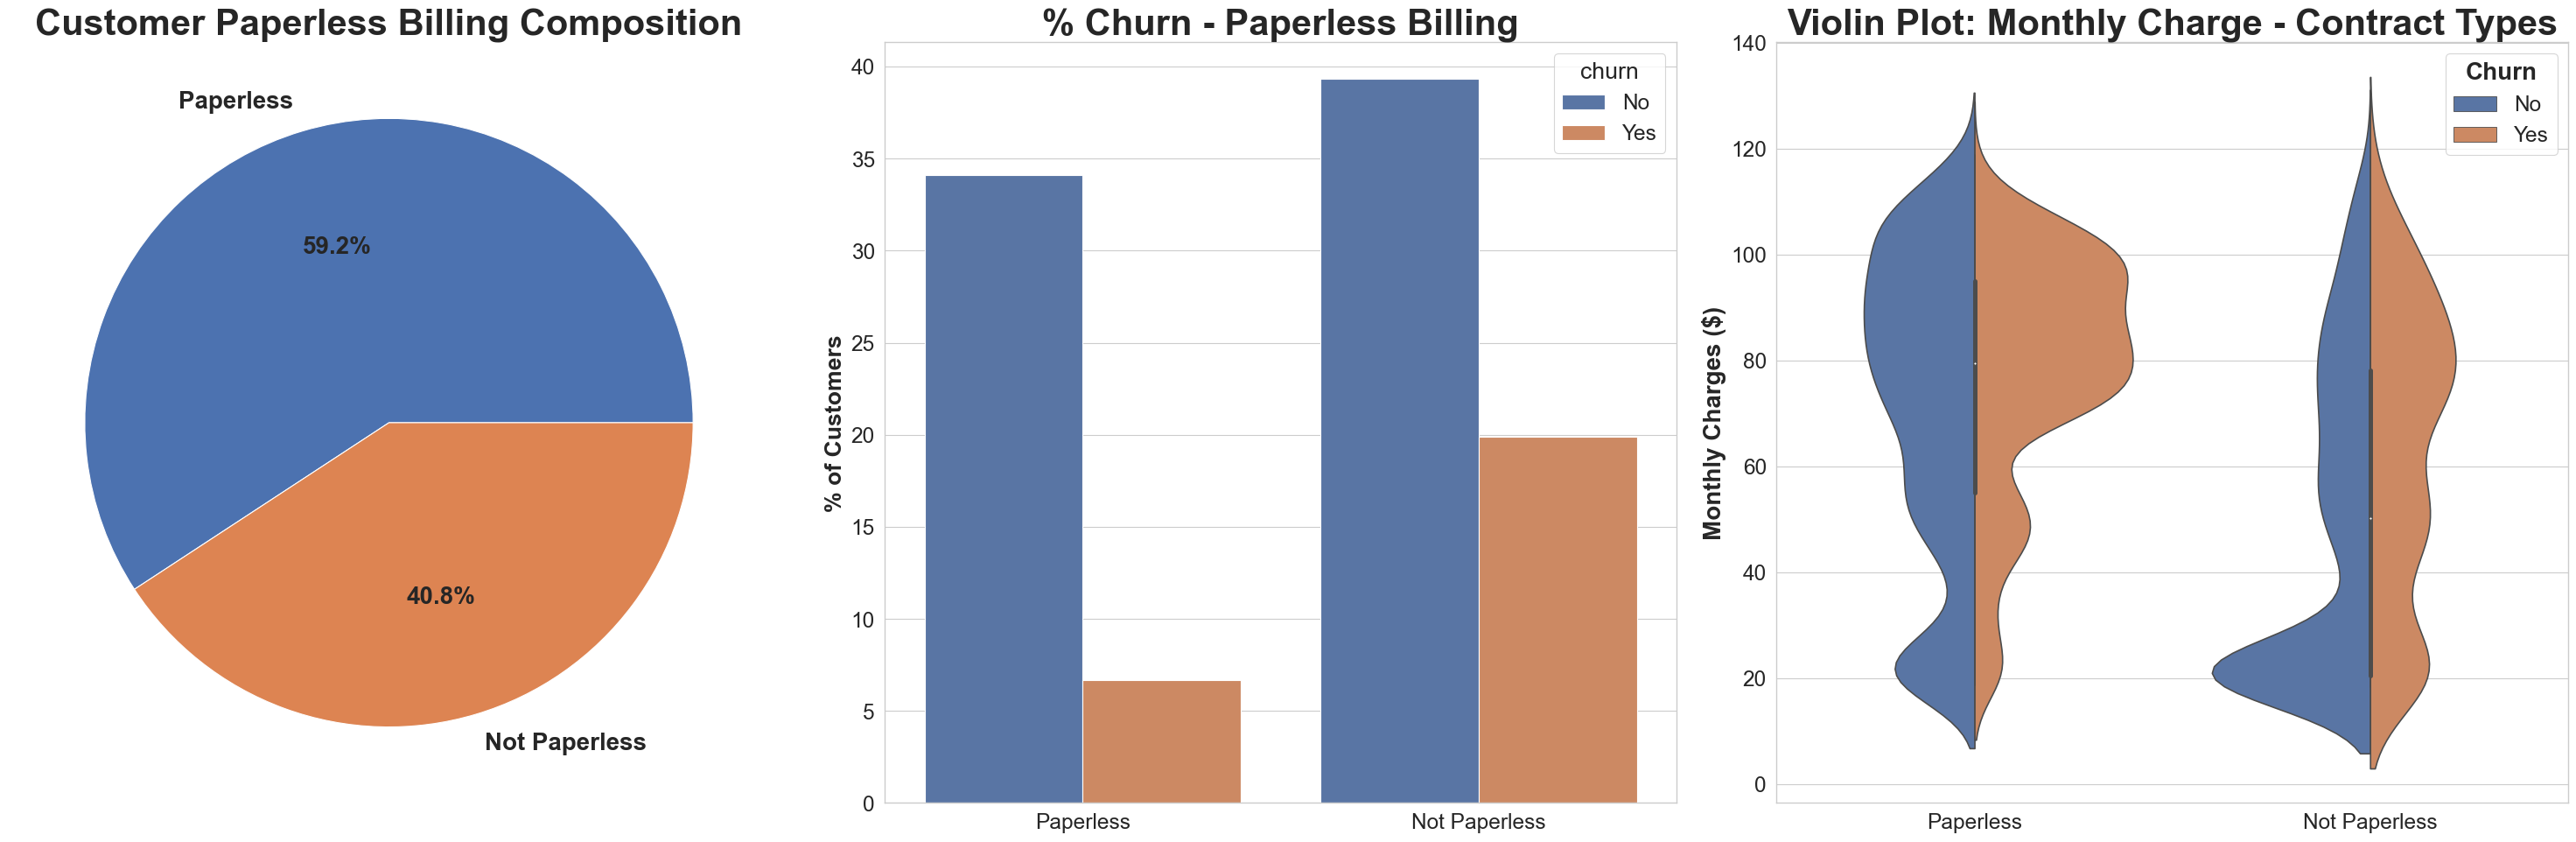

In [25]:
paperless_plot(cc)

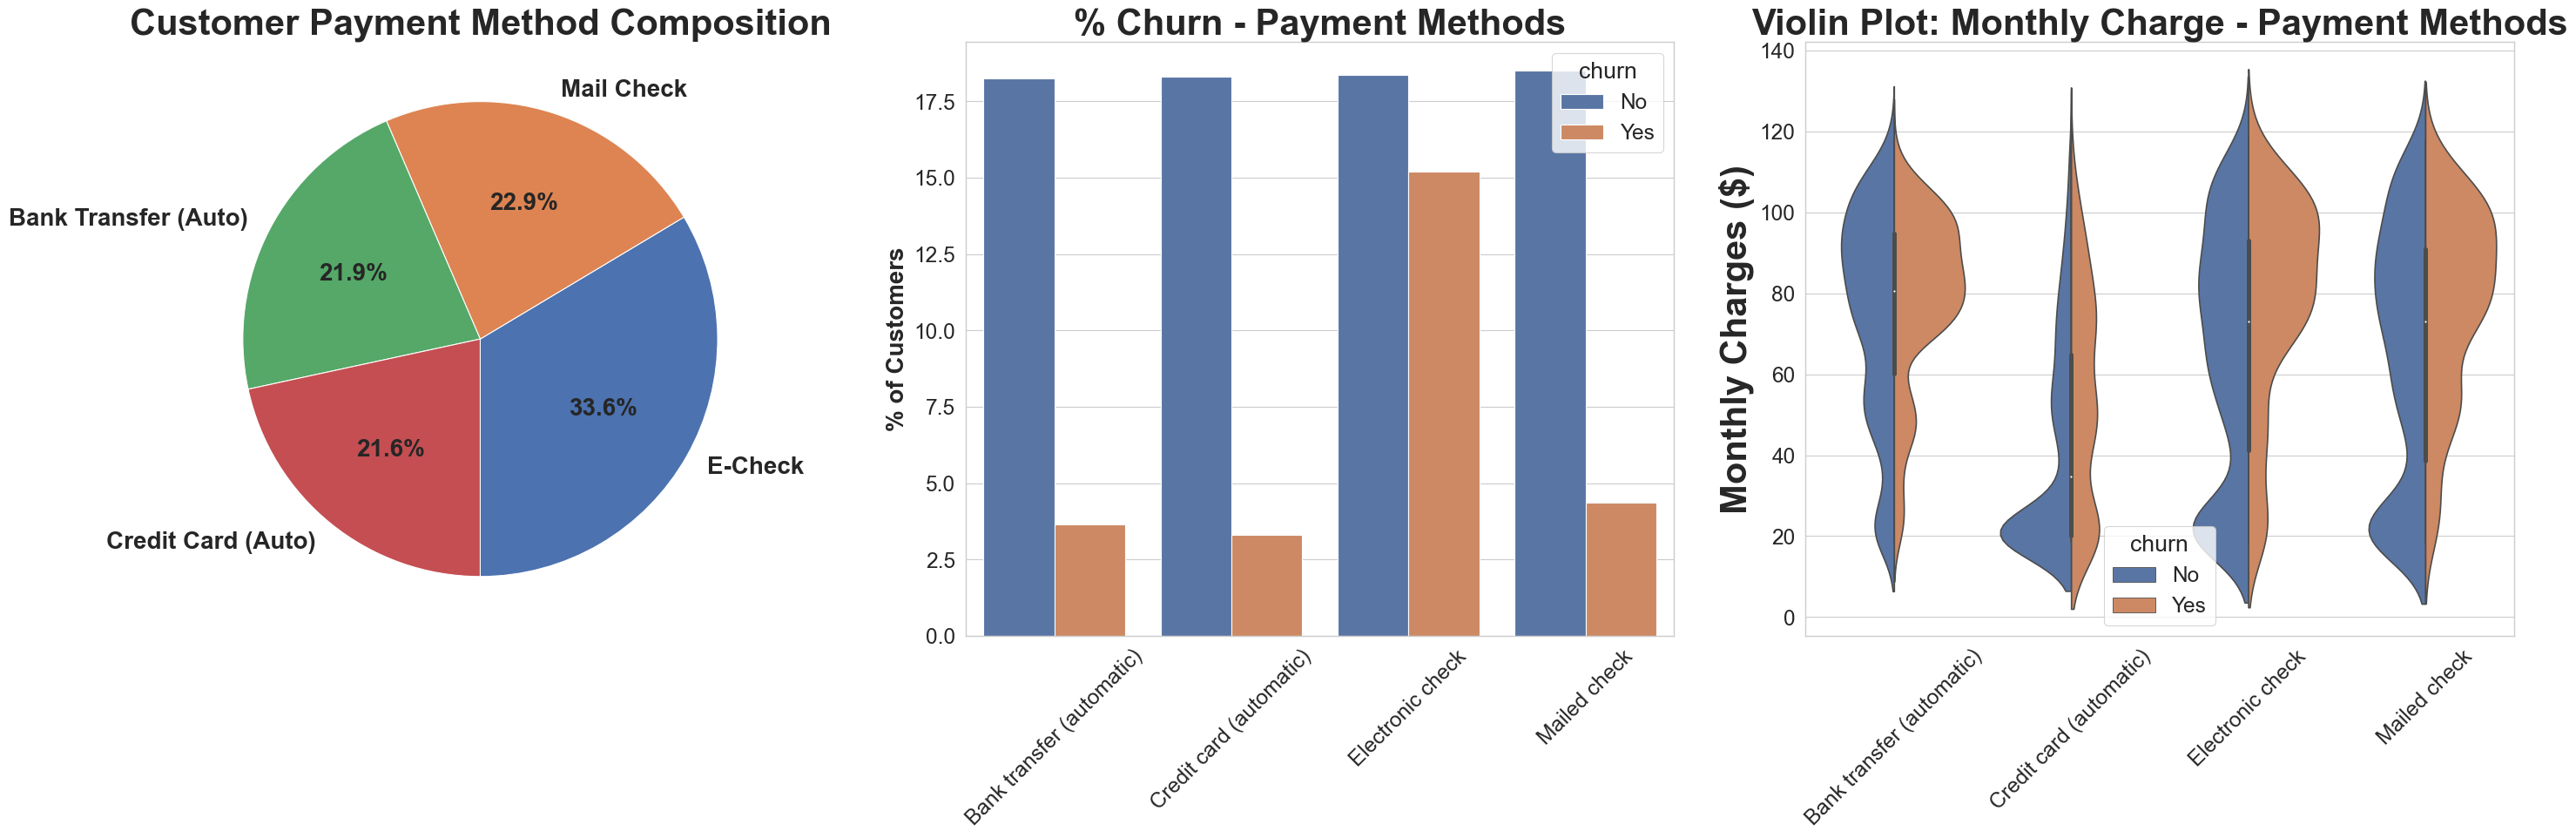

In [26]:
methods_plot(cc)

* Customers with non-paperless billing have nearly 15% higher churn rate.
* when the monthly charge is below $60, paperless and non-paperless billing customers churn at similar rates. Once charge is above $60, more paperless customers churn.
* Customers paying by creditc card have consistent churn rates regardless of the monthly charges.
* When the monthly charges in above &60, there is a small increase in the churn rate ofcustomers paying by bank transfer, e-check, mail-check.